In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("./Social_Network_Ads.csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
X = dataset.iloc[:, :-1]  # 選取除最後一列以外的所有列
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [4]:
y = dataset.iloc[:, -1].to_frame() # 選取最後一列作為y
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


## Splitting the dataset

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size=0.8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320, 1), (80, 1))

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train_df = pd.DataFrame(X_train, columns=['Age', 'EstimatedSalary']) # ndarray轉dataframe
X_train_df.head()

,Age,EstimatedSalary
0,-0.516606,1.410878
1,1.544909,-1.069458
2,-1.203777,0.604022
3,-0.025769,0.066117
4,-1.105610,0.066117


## Training the Logistic Regression model

In [7]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

c:\Users\33313\.conda\envs\openai\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

## Predicting a new result
- Predicting a new result

In [8]:
result = classifier.predict(
    sc.transform(
        [[30,87000]])
        )
result

c:\Users\33313\.conda\envs\openai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

- Predicting the Test set results

In [12]:
y_pred = classifier.predict(X_test)
print(type(y_pred)) # <class 'numpy.ndarray'>
print(type(y_test)) # <class 'pandas.core.frame.DataFrame'>

# 確保 y_pred 和 y_test 是 NumPy 陣列
# y_pred_numpy = y_pred.to_numpy().flatten()  # 從 DataFrame 提取為 NumPy 陣列並展平
y_test_numpy = y_test.to_numpy().flatten()  # 將 y_test 也轉換為 NumPy 陣列並展平

# 合併成 DataFrame
result_df = pd.DataFrame({
    "y_pred": y_pred,  # 一維的預測值
    "y_test": y_test_numpy   # 一維的真實值
})

# 顯示結果
result_df.head()

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


,y_pred,y_test
0,0,0
1,0,1
2,0,0
3,1,0
4,0,0


## Making the Confusion Matrix

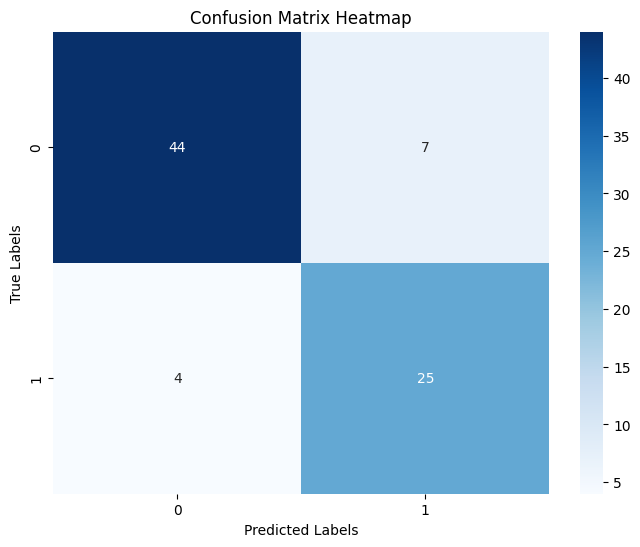

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# 假設 y_test 和 y_pred 已定義
# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 創建熱圖
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # fmt='d' 表示整數格式
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()